# Shallow Machine Learning Models: Naive Bayes Classifier

### Import Libraries including from `sklearn` for shallow ML

In [1]:
# For Data Wrangling:
import numpy as np
import pandas as pd
import xarray as xr

# ML Modeling:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import joblib

# For Data Plotting:
import matplotlib.pyplot as plt
import seaborn as sns

# Useful to have:
from progressbar import progressbar

#ignorewarnings
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    Data Preprocessing
</div>

### Load txt files containing variables -- pandas' `read_csv function`

In [2]:
# Data are imported in Dataframe format
Sgssm = pd.read_csv('0_Barbados_Sargassum.txt', delimiter="\t")

In [3]:
# Define feature columns
features = ["560", "665", "704", "740", "783", "833", "865", "1614", "SLOPE", "FDI"]

X = Sgssm[features]
y = Sgssm["Class"]

# Needs to be (n,n)(n,)
print(X.shape, y.shape)

(194, 10) (194,)


### Split the data into two sets: `training` (80%) and `test` (20%)

In [4]:
# Split your dataset so 20% is set aside for testing (0.2) 
# Set random_state to ensure yr train-test split is always the same (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the 80% training: 20% testing split
print("Trainin set size:", X_train.shape[0])
print("Testing set size:",  X_test.shape[0])

Trainin set size: 155
Testing set size: 39


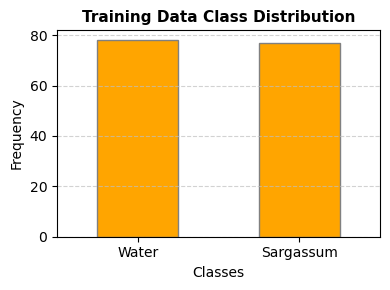

In [16]:
# Check distribution of classes in the training set
plt.figure(figsize = (4, 3))
ax = y_train.value_counts().plot(kind = 'bar', color = 'orange', edgecolor = 'grey')
# Formatting
ax.set_title("Training Data Class Distribution", fontsize = 11, fontweight = 'bold')
ax.set_xlabel("Classes", fontsize = 10)
ax.set_ylabel("Frequency",fontsize= 10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', color='silver', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    
    Gaussian Naive Bayes Classifier
<div>

In [6]:
#Fit the model on training set
clf = GaussianNB()
clf.fit(X_train, y_train);

# Classify based on test data
y_pred = clf.predict(X_test)

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    Evaluating Model Performance
</div>

### Metrics for Gaussian NB classifier: `Accuracy`, `Precision`, `Recall`, `F1-score`

In [7]:
# Calcuate error/accuracy on y_test
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 1.00


### Classification Report

In [8]:
# Predict on the test set and evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Sargassum       1.00      1.00      1.00        17
       Water       1.00      1.00      1.00        22

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### Confusion Matrix

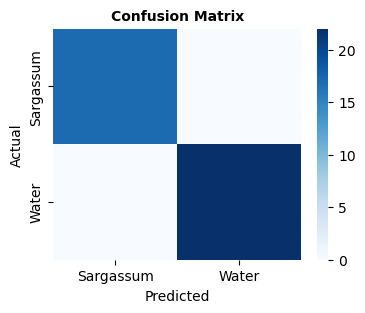

In [17]:
# Create confusion matrix from model.predict output
cm = confusion_matrix(y_test, y_pred)
# Define class names (ensure order matches your mapping)
labels = ["Sargassum", "Water"]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize = (4, 3))
sns.heatmap(cm, fmt= ".1f", cmap = "Blues", 
            xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize = 10, weight = 'bold')
plt.show()

In [10]:
# Save newly trained GNB model to file
joblib.dump(clf, "GNB_Classifier.pkl")

# Later, to load the model:
# clf = joblib.load("sargassum_classifier.pkl")

['GNB_Classifier.pkl']

<div class="alert alert-info" role="alert" 
     style="font-size: 1.8em; font-weight: bold; padding: 15px; margin: 10px 0; text-align: center; background-color: #d9edf7; border-color: #bce8f1; color: #31708f; border-radius: 8px;">
    Testing GNB on Sentinel-2 Subset
</div>

### FUNCTIONS

In [11]:
def get_band_mapping_with_zeroing(S2_data):
    # Adjust mapping to include a reference band, e.g., "2202"
    available = list(S2_data.data_vars.keys())
    if "rhos_560" in available:
        return {
            "492": "rhos_492",
            "560": "rhos_560",
            "665": "rhos_665",
            "704": "rhos_704",
            "740": "rhos_740",
            "783": "rhos_783",
            "833": "rhos_833",
            "865": "rhos_865",
            "1614": "rhos_1614",
            "2202": "rhos_2202"   # Reference band for zeroing
        }
    else:
        return {
            "492": "rhos_492",
            "560": "rhos_559",
            "665": "rhos_665",
            "704": "rhos_704",
            "740": "rhos_739",
            "783": "rhos_780",
            "833": "rhos_833",
            "865": "rhos_864",
            "1614": "rhos_1610",
            "2202": "rhos_2186"  # Adjust as needed for your product
        }

def compute_features_with_zeroing(S2_data):
    mapping = get_band_mapping_with_zeroing(S2_data)
    
    # Extract bands
    band560  = S2_data[mapping["560"]].values
    band665  = S2_data[mapping["665"]].values
    band704  = S2_data[mapping["704"]].values
    band740  = S2_data[mapping["740"]].values
    band783  = S2_data[mapping["783"]].values
    band833  = S2_data[mapping["833"]].values
    band865  = S2_data[mapping["865"]].values
    band1614 = S2_data[mapping["1614"]].values
    band2202 = S2_data[mapping["2202"]].values  # Reference band
    
    # Define a helper to subtract band2202 and clip to 0
    def zero_and_clip(band, ref):
        result = band - ref
        result[result < 0] = 0
        return result
    
    # Apply zeroing to each band
    band560  = zero_and_clip(band560, band2202)
    band665  = zero_and_clip(band665, band2202)
    band704  = zero_and_clip(band704, band2202)
    band740  = zero_and_clip(band740, band2202)
    band783  = zero_and_clip(band783, band2202)
    band833  = zero_and_clip(band833, band2202)
    band865  = zero_and_clip(band865, band2202)
    band1614 = zero_and_clip(band1614, band2202)
    
    # Compute additional indices using the zeroed bands
    SLOPE = (band833 - band704) * 179
    FDI   = band833 - (band704 + (band1614 - band740) * 1.636)
    
    return {
        "560": band560,
        "665": band665,
        "704": band704,
        "740": band740,
        "783": band783,
        "833": band833,
        "865": band865,
        "1614": band1614,
        "SLOPE": SLOPE,
        "FDI": FDI
    }

def get_class_with_zeroing(S2_data):
    """
    Build the feature matrix from S2_data, applying the zeroing step,
    predict classes using the trained classifier, and reshape the output.
    """
    features = compute_features_with_zeroing(S2_data)
    
    # Specify feature order matching training.
    feature_order = ["560", "665", "704", "740", "783", "833", "865", "1614", "SLOPE", "FDI"]
    sample_shape = features[feature_order[0]].shape
    
    # Flatten each feature into a 1D array and stack them as columns
    feature_matrix = np.column_stack([features[f].flatten() for f in feature_order])
    
    # Predict classes using the trained classifier (model must be loaded)
    predictions = model.predict(feature_matrix)
    
    # Reshape predictions back to the original spatial grid.
    predictions = predictions.reshape(sample_shape)
    return predictions
    

### Load subset Sentinel-2 netCDF -- xarray `open.dataset` function

In [12]:
S2_data = xr.open_dataset("subset__S2B_MSI_20180426_PUR_L2R_Barbados.nc") 
# S2_data

In [13]:
# Load the GNB classifier:
model = joblib.load("GNB_Classifier.pkl")

# Apply classification. Runs in parallel and will print progress
for i in progressbar(range(100)): 
    out_class = get_class_with_zeroing(S2_data)

100% (100 of 100) |######################| Elapsed Time: 0:00:15 Time:  0:00:150001


### Plotting predicated classes

In [14]:
# Convert string labels to numeric codes:
label_uni = np.unique(out_class)
label_int = {label: i for i, label in enumerate(label_uni)}

# Create a numeric version of out_class
out_class_num = np.vectorize(label_int.get)(out_class)

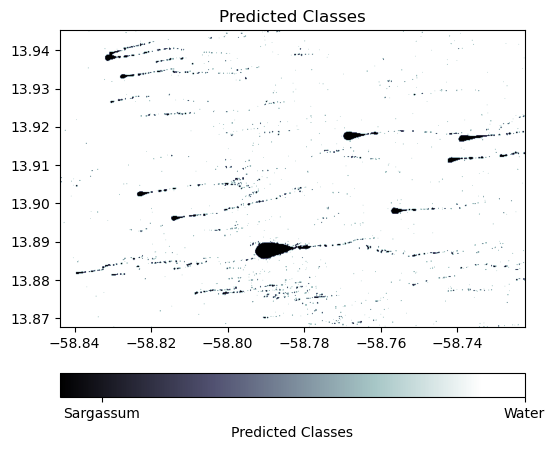

In [15]:
# Extract latitude and longitude arrays from S2_data
lat2d = S2_data['lat'].values  # 2D array, shape (616, 949)
lon2d = S2_data['lon'].values  # 2D array

# Compute the extent boundaries
lon_min, lon_max = np.nanmin(lon2d), np.nanmax(lon2d)
lat_min, lat_max = np.nanmin(lat2d), np.nanmax(lat2d)

# Now plot the numeric array:
plt.figure(figsize = (6, 6))
plt.imshow(out_class_num, cmap='bone', origin='upper',
           extent=[lon_min, lon_max, lat_min, lat_max])
cbar = plt.colorbar(orientation= 'horizontal', fraction = 0.1, pad = 0.1)

# Set colorbar ticks centered on each class. Use the integer codes.
num_classes = len(label_uni)
ticks = np.arange(0.1, num_classes, 1)
cbar.set_ticks(ticks)

# Optionally label ticks with the class names
cbar.set_ticklabels([str(label) for label in label_uni])
cbar.set_label('Predicted Classes', fontsize = 10)
plt.title("Predicted Classes")

plt.show()